# Содержание #
<div>
    <ol>
        <li>
            <a href="#project">Проект "Определение возраста покупателей"</a>
        </li>
        <li>
            <a href="#import">Импорт библиотек</a>
        </li>
        <li>
            <a href="#analyze">Исследовательский анализ данных</a>
        </li>
        <li>
            <a href="#model">Обучение модели</a>
        </li>
        <li>
            <a href="#model_analyze">Анализ обученной модели</a>
        </li>
    </ol>
</div>

<a id='project'></a>
# Проект "Определение возраста покупателей" #

<a id='import'></>
# Импорт библиотек #

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from IPython.display import display

<a id='analyze'></a>
# Исследовательский анализ данных #

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(dataframe=labels,
                                                   directory='/datasets/faces/final_files/',
                                                   x_col='file_name',
                                                   y_col='real_age',
                                                   target_size=(244,244),
                                                   batch_size=32,
                                                   class_mode='raw',
                                                   seed=12345)

Found 7591 validated image filenames.


In [3]:
features, target = next(train_gen_flow)

In [4]:
display(features.shape)

(32, 244, 244, 3)

In [5]:
display(labels.shape)

(7591, 2)

In [6]:
display(features[0])

array([[[0.5764706 , 0.5137255 , 0.454902  ],
        [0.54509807, 0.48235297, 0.42352945],
        [0.5254902 , 0.46274513, 0.4039216 ],
        ...,
        [0.4901961 , 0.42352945, 0.3137255 ],
        [0.49411768, 0.427451  , 0.31764707],
        [0.49803925, 0.43137258, 0.32156864]],

       [[0.5372549 , 0.47450984, 0.4156863 ],
        [0.50980395, 0.44705886, 0.38823533],
        [0.53333336, 0.47058827, 0.41176474],
        ...,
        [0.48627454, 0.41960788, 0.30980393],
        [0.49803925, 0.43137258, 0.32156864],
        [0.50980395, 0.4431373 , 0.33333334]],

       [[0.53333336, 0.4666667 , 0.4039216 ],
        [0.5137255 , 0.44705886, 0.38431376],
        [0.52156866, 0.454902  , 0.3921569 ],
        ...,
        [0.5137255 , 0.44705886, 0.3372549 ],
        [0.5058824 , 0.43921572, 0.32941177],
        [0.5058824 , 0.43921572, 0.32941177]],

       ...,

       [[0.07058824, 0.46274513, 0.5254902 ],
        [0.09411766, 0.48627454, 0.54901963],
        [0.07058824, 0

In [7]:
display(labels)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


(array([149.,  88.,  25., 101.,  87.,  68.,  67.,  44.,  34.,  45.,  51.,
         56.,  79., 125., 128., 193., 163., 193., 180., 178., 143., 179.,
        213., 211., 315., 226., 229., 217., 164., 317., 129., 174., 144.,
        156., 147., 122., 144., 124., 107., 167.,  98.,  99.,  85.,  96.,
         88.,  74.,  93.,  66.,  74., 156.,  70.,  76.,  45.,  44.,  51.,
         41.,  37.,  54.,  41.,  75.,  28.,  28.,  20.,  23.,  36.,  18.,
         18.,  15.,  18.,  50.,  10.,  13.,  10.,   6.,  17.,   7.,   8.,
          3.,   6.,  31.,   3.,   5.,   3.,   8.,  12.,   3.,   6.,   3.,
          4.,  21.,   1.,   0.,   1.,   5.,   2.,   2.,   1.,   0.,   0.,
          1.]),
 array([  1.  ,   1.99,   2.98,   3.97,   4.96,   5.95,   6.94,   7.93,
          8.92,   9.91,  10.9 ,  11.89,  12.88,  13.87,  14.86,  15.85,
         16.84,  17.83,  18.82,  19.81,  20.8 ,  21.79,  22.78,  23.77,
         24.76,  25.75,  26.74,  27.73,  28.72,  29.71,  30.7 ,  31.69,
         32.68,  33.67,  34.66

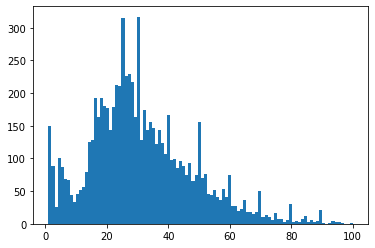

In [8]:
plt.hist(x=labels['real_age'], bins=100)

## Анализ гистограммы ##
1. данные распределены неравномерно, наблюдается смещение влево
2. наибольшую часть датасета составляют фото людей в возрасте от 19 до 43 лет

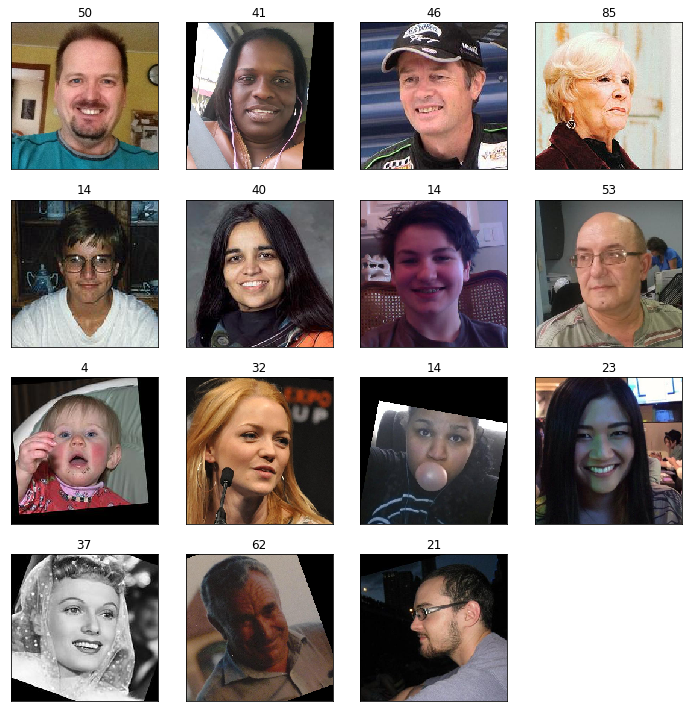

In [9]:
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title(target[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])    
    plt.tight_layout()

## Результаты исследовательского анализа ##
1. Представленный датасет содержит 7591 строку, такого количества данных недостаточно для получения корректно обученной модели. Вероятнее всего будет наблюдаться переобучение модели.
2. В датасете присутствуют фото людей в возрасте от 2 до 10 лет. Указанные данные можно считать выбросом. 
Возможные причины появления подобных выбросов: 
- датасет готовился для решения другой, более широкой задачи;
- недобросовестный подход к задаче, персонала готовившего датасет;
3. Датасет состоит из:
- цветных фото
- чернобелых фото
- качество изображений сильно различается: 
    * присутствуют фотографии в высоком и низком разрешении
    * присутствуют изображения высокой и низкой четкости
    * присутствуют изображения с горизонтальным поворотом, возможно возникнет необходимость использовать горизонтальную аугментацию

<a id='model'></a>
# Обучение модели #

In [ ]:
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

def create_model(input_shape):
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

```

2021-10-28 07:08:34.003848: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6

2021-10-28 07:08:34.479296: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6

Using TensorFlow backend.

Found 5694 validated image filenames.

Found 1897 validated image filenames.

2021-10-28 07:08:50.477973: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1

2021-10-28 07:08:51.180678: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 

pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0

coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s

2021-10-28 07:08:51.181589: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

2021-10-28 07:08:51.181651: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2021-10-28 07:08:51.550109: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10

2021-10-28 07:08:51.613186: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10

2021-10-28 07:08:52.669118: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10

2021-10-28 07:08:52.763660: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10

2021-10-28 07:08:52.763812: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

2021-10-28 07:08:52.768240: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0

2021-10-28 07:08:52.768642: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA

2021-10-28 07:08:52.942750: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz

2021-10-28 07:08:52.946075: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x49ac9a0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:

2021-10-28 07:08:52.946115: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

2021-10-28 07:08:53.345192: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56f5230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:

2021-10-28 07:08:53.345229: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0

2021-10-28 07:08:53.347679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 

pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0

coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s

2021-10-28 07:08:53.347742: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

2021-10-28 07:08:53.347753: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2021-10-28 07:08:53.347781: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10

2021-10-28 07:08:53.347790: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10

2021-10-28 07:08:53.347799: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10

2021-10-28 07:08:53.347807: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10

2021-10-28 07:08:53.347815: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

2021-10-28 07:08:53.352277: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0

2021-10-28 07:08:53.387153: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

2021-10-28 07:09:01.576466: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:

2021-10-28 07:09:01.576521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 

2021-10-28 07:09:01.576529: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 

2021-10-28 07:09:01.596814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)

<class 'tensorflow.python.keras.engine.sequential.Sequential'>

WARNING:tensorflow:sample_weight modes were coerced from

  ...

    to  

  ['...']

WARNING:tensorflow:sample_weight modes were coerced from

  ...

    to  

  ['...']

Train for 356 steps, validate for 119 steps

Epoch 1/20

2021-10-28 07:09:40.938553: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2021-10-28 07:09:44.546199: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

356/356 - 116s - loss: 200.9410 - mae: 10.8273 - val_loss: 327.6797 - val_mae: 13.4308

Epoch 2/20

356/356 - 39s - loss: 127.2686 - mae: 8.6359 - val_loss: 256.7871 - val_mae: 12.4182

Epoch 3/20

356/356 - 39s - loss: 108.9541 - mae: 8.0000 - val_loss: 374.4716 - val_mae: 14.2434

Epoch 4/20

356/356 - 39s - loss: 93.4349 - mae: 7.4201 - val_loss: 133.4625 - val_mae: 8.5540

Epoch 5/20

356/356 - 39s - loss: 77.8190 - mae: 6.7787 - val_loss: 117.2860 - val_mae: 7.9433

Epoch 6/20

356/356 - 39s - loss: 64.2726 - mae: 6.1605 - val_loss: 101.8924 - val_mae: 7.5132

Epoch 7/20

356/356 - 39s - loss: 57.3266 - mae: 5.8235 - val_loss: 139.4548 - val_mae: 9.2987

Epoch 8/20

356/356 - 39s - loss: 52.1760 - mae: 5.5363 - val_loss: 105.8529 - val_mae: 8.1568

Epoch 9/20

356/356 - 39s - loss: 46.8452 - mae: 5.2124 - val_loss: 136.5673 - val_mae: 8.5506

Epoch 10/20

356/356 - 39s - loss: 36.7467 - mae: 4.6613 - val_loss: 95.9648 - val_mae: 7.4515

Epoch 11/20

356/356 - 39s - loss: 31.3110 - mae: 4.2959 - val_loss: 123.0068 - val_mae: 8.3836

Epoch 12/20

356/356 - 39s - loss: 27.9879 - mae: 4.0720 - val_loss: 88.5361 - val_mae: 7.0082

Epoch 13/20

356/356 - 39s - loss: 26.7465 - mae: 3.9883 - val_loss: 102.3540 - val_mae: 7.8929

Epoch 14/20

356/356 - 38s - loss: 22.4552 - mae: 3.6680 - val_loss: 82.3108 - val_mae: 7.0052

Epoch 15/20

356/356 - 39s - loss: 21.1279 - mae: 3.5196 - val_loss: 91.5532 - val_mae: 7.0298

Epoch 16/20

356/356 - 39s - loss: 18.6169 - mae: 3.3453 - val_loss: 96.7499 - val_mae: 7.6979

Epoch 17/20

356/356 - 39s - loss: 18.0676 - mae: 3.2916 - val_loss: 86.6023 - val_mae: 7.0988

Epoch 18/20

356/356 - 39s - loss: 17.8523 - mae: 3.2350 - val_loss: 79.2086 - val_mae: 6.7117

Epoch 19/20

356/356 - 39s - loss: 17.2494 - mae: 3.2245 - val_loss: 92.0024 - val_mae: 7.2713

Epoch 20/20

356/356 - 38s - loss: 17.4175 - mae: 3.1941 - val_loss: 96.3645 - val_mae: 7.3951

WARNING:tensorflow:sample_weight modes were coerced from

  ...

    to  

  ['...']


```

<a id='model_analyze'></a>
# Анализ обученной модели #

В результате решения задачи определения возраста покупателй была обучена модель компьютерного зрения на основе нейросети ResNet50.
Метрикой качества работы модели выбрана MAE. По условиям задачи качество модели должно быть не больше 8. MAE представленной модели обученной на предоставленных данных составило 7.4